In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_csv("data/combined_expression.csv")

In [90]:
data.head()

,CELL_LINE_NAME,classification,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,COL15A1,C6orf10,TMEM225,NOTCH4,PBX2,AGER,RNF5,AGPAT1,DFNB59,PRRT1
0,1240121,5,6.419526,3.182094,9.320548,3.759654,3.802619,3.215753,4.698729,7.873672,...,3.245454,2.953508,3.543429,3.352022,4.672310,3.641128,3.135310,3.737072,3.450927,3.168800
1,1240122,6,7.646494,2.626819,10.153853,3.564755,3.942749,3.290760,3.551675,8.252413,...,2.786709,3.077382,3.728232,3.208882,4.586840,3.395654,3.586800,3.519128,3.115323,3.051645
2,1240123,5,8.319417,3.111183,9.643558,4.757258,3.919757,3.602185,3.329644,9.076950,...,3.459089,3.085394,3.462811,3.339030,4.614897,3.395845,3.419193,3.971646,3.729310,3.320022
3,1240124,1,9.006994,3.028173,9.686700,4.280504,3.147646,3.188881,3.293807,8.678790,...,2.835403,2.960303,3.415083,3.290171,4.770123,3.400821,3.383734,3.798107,2.822404,3.297547
4,1240127,6,7.985676,2.694729,10.676134,4.159685,3.804637,3.481942,3.111261,7.555407,...,2.896523,2.849899,3.480114,3.226128,5.832710,3.612179,3.347095,4.457963,5.198524,4.553586


In [50]:
X = data.drop(columns=['CELL_LINE_NAME', 'classification'])
y = df['classification']
feat_labels = list(X.columns)

In [54]:
# 20% test, 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
# create and train the classifier
clf = RandomForestClassifier(n_estimators=X.shape[1], random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16381,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
# associating each feature with its relative importance
feat_importances = list(zip(feat_labels, clf.feature_importances_))

In [ ]:
# sorting the feature importances
def sort_tuple(tup):
    tup.sort(key = lambda x: x[1], reverse=True)
    return tup
sort_tuple(feat_importances)

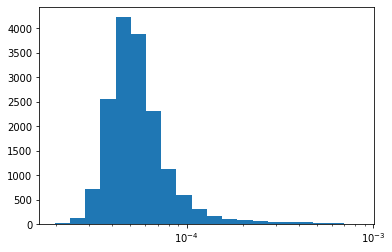

In [130]:
# plotting the feature importances
import matplotlib.pyplot as plt
indices = np.arange(len(feat_importances))
x, y = zip(*feat_importances)

def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')
plot_loghist(y, 20)

In [80]:
# creating selector object that uses random forest classifier to identify features
# importance of more than e-04 will be used to select features
sfm = SelectFromModel(clf, threshold=1e-4)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=16381, n_jobs=-1,
                                                 oob_score=False,

In [85]:
# transforming data to create new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [86]:
# creating and training new random forest classifier for most important features
clf_important = RandomForestClassifier(n_estimators=X.shape[1], random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16381,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
# apply the full-featured classifier to test data
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5045871559633027

In [88]:
# apply important features classifier to test data
y_important_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)

0.48623853211009177

In [102]:
s_feats = pd.DataFrame(selected_feats)
s_feats.to_csv('selected_genes.csv', index=False)